線形回帰

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

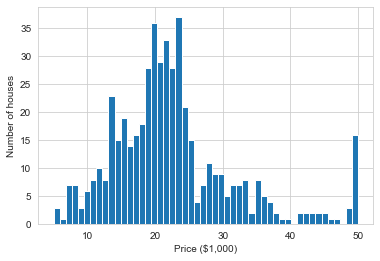

In [9]:
plt.hist(boston.target, bins=50)
plt.xlabel("Price ($1,000)")
plt.ylabel("Number of houses")

Text(0.5, 0, 'Number of rooms')

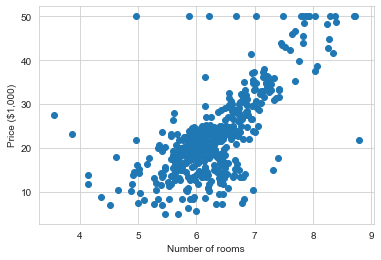

In [12]:
plt.scatter(boston.data[:,5], boston.target)
plt.ylabel("Price ($1,000)")
plt.xlabel("Number of rooms")

In [13]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

In [14]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
boston_df["Price"] = boston.target

In [16]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


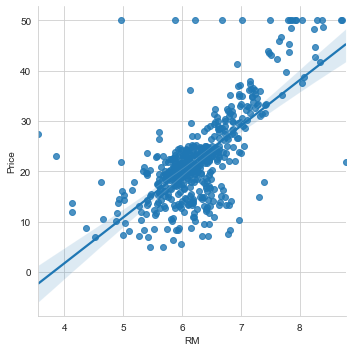

In [17]:
sns.lmplot("RM", "Price", data=boston_df)

In [36]:
X = boston_df.RM

In [19]:
X.shape

(506,)

In [20]:
X = np.vstack(boston_df.RM)

In [21]:
X.shape

(506, 1)

In [37]:
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [23]:
Y = boston_df.Price

In [39]:
X = np.array([[value, 1] for value in X])

In [42]:
a,b = np.linalg.lstsq(X,Y)[0]

<ipython-input-42-dc5ee43661c7>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a,b = np.linalg.lstsq(X,Y)[0]


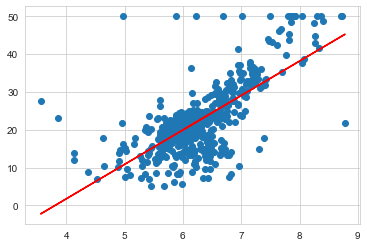

In [45]:
plt.plot(boston_df.RM, boston_df.Price, "o")

x = boston_df.RM
plt.plot(x, a*x+b, "r")

In [47]:
result = np.linalg.lstsq(X,Y)

<ipython-input-47-135b1c56a2aa>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(X,Y)


In [50]:
error_total = result[1]
rmse = np.sqrt(error_total/len(X))

In [61]:
print("平均二乗誤差の平方根={:0.2f}".format(rmse[0]))

平均二乗誤差の平方根=6.60


In [62]:
import sklearn
from sklearn.linear_model import LinearRegression

In [63]:
lreg = LinearRegression()

In [68]:
X_multi = boston_df.drop("Price", 1)

In [115]:
X_multi.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [69]:
X_multi.shape

(506, 13)

In [70]:
Y_target = boston_df.Price

In [116]:
Y_target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [71]:
lreg.fit(X_multi, Y_target)

LinearRegression()

In [72]:
lreg.intercept_

36.4594883850902

In [73]:
len(lreg.coef_)

13

In [74]:
coeff_df = DataFrame(boston_df.columns)

In [76]:
coeff_df.columns=["Features"]

In [77]:
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

In [78]:
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [98]:
X_train, X_test, Y_train, Y_test =sklearn.model_selection.train_test_split(X_multi, boston_df.Price)

In [99]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [100]:
lreg = LinearRegression()

In [101]:
lreg.fit(X_train, Y_train)

LinearRegression()

In [102]:
pred_train = lreg.predict(X_train)

In [103]:
pred_test = lreg.predict(X_test)

In [104]:
np.mean((Y_train - pred_train) ** 2)

23.870637758058884

In [105]:
np.mean((Y_test - pred_test) ** 2)

17.0079708419146

Text(0.5, 1.0, 'Residual Plots')

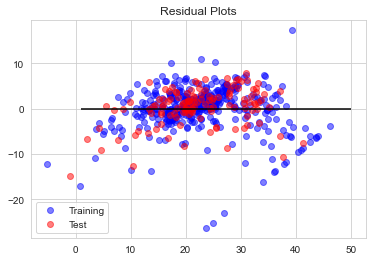

In [114]:
train = plt.scatter(pred_train, (pred_train-Y_train), c="b", alpha=0.5)
test = plt.scatter(pred_test, (pred_test-Y_test), c="r", alpha=0.5)
plt.hlines(y=0, xmin=1.0, xmax=50)

plt.legend((train, test), ("Training", "Test"), loc="lower left")
plt.title("Residual Plots")